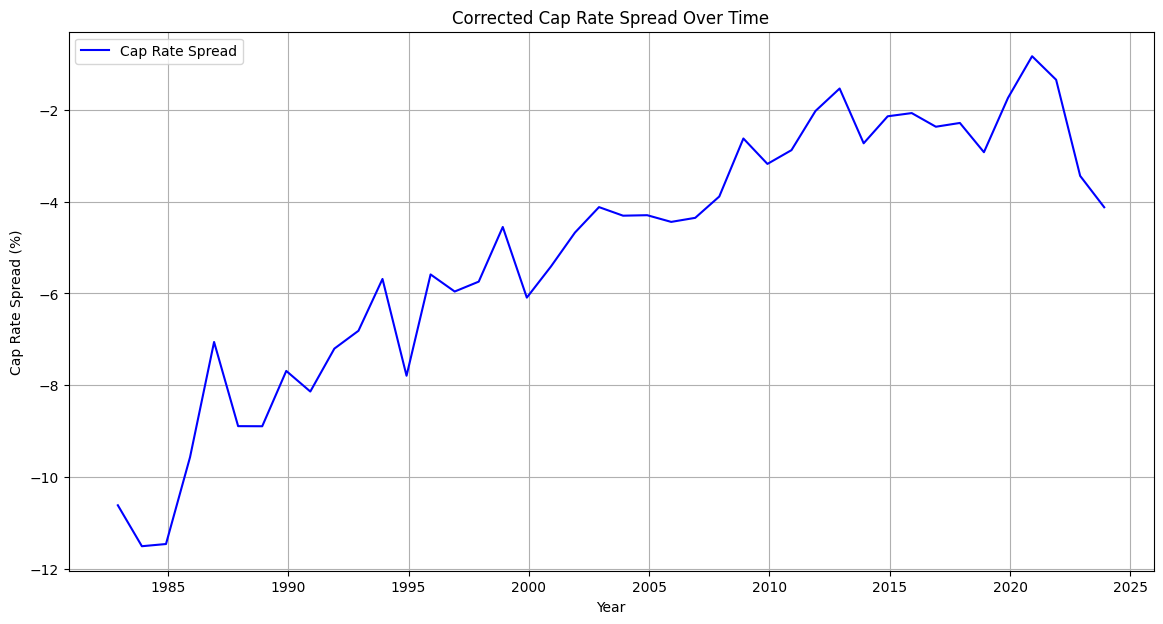

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 10-year Treasury rate data
treasury_data_path = '/Users/owenkadis/Downloads/10yr.csv'
treasury_data = pd.read_csv(treasury_data_path)

# Load the office cap rate data
office_data_path = '/Users/owenkadis/Downloads/Office Annual CSV.csv'
office_data = pd.read_csv(office_data_path)

# Filter the office data for 'Period' and 'Market Cap Rate'
office_cap_rate_data = office_data[['Period', 'Market Cap Rate']].dropna()

# Assuming 'Period' format is "YYYY Q[1-4]", we convert it to the last month of the respective quarter
month_mapping = {'Q1': '03', 'Q2': '06', 'Q3': '09', 'Q4': '12'}
office_cap_rate_data['Date'] = office_cap_rate_data['Period'].apply(
    lambda x: f"{x.split(' ')[0]}-{month_mapping[x.split(' ')[1]]}-01")

# Convert 'Date' columns in both datasets to datetime objects for comparison
office_cap_rate_data['Date'] = pd.to_datetime(office_cap_rate_data['Date'])
treasury_data['Date'] = pd.to_datetime(treasury_data['Date'])

# Average the Market Cap Rate for each period before merging with the treasury data
office_cap_rate_avg = office_cap_rate_data.groupby('Date')['Market Cap Rate'].mean().reset_index()

# Merge the averaged office cap rate data with the treasury data
merged_avg_data = pd.merge_asof(office_cap_rate_avg.sort_values('Date'), treasury_data.sort_values('Date'), on='Date', direction='nearest')

# Recalculate the Cap Rate Spread with the averaged data
merged_avg_data['Cap Rate Spread'] = merged_avg_data['Market Cap Rate'] - merged_avg_data['Value']

# Plotting the corrected cap rate spread over time
plt.figure(figsize=(14, 7))
plt.plot(merged_avg_data['Date'], merged_avg_data['Cap Rate Spread'], label='Cap Rate Spread', color='blue')
plt.title('Corrected Cap Rate Spread Over Time')
plt.xlabel('Year')
plt.ylabel('Cap Rate Spread (%)')
plt.legend()
plt.grid(True)
plt.show()
